### Please contact me here in case there are any issues with running the code - shihabur.samrat@abo.fi

Import libraries.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load dataset.

[Dataset Link for reference](https://www.kaggle.com/datasets/nikhilkhetan/indian-flight-schedules?select=Flight_Schedule_without_missing.csv)

In [2]:
# Load dataset from github
df = pd.read_csv("https://raw.githubusercontent.com/ShihaburRahmann/data_science_p1/master/Flight_Schedule_without_missing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   flightNumber            31680 non-null  object
 1   airline                 31680 non-null  object
 2   origin                  31680 non-null  object
 3   destination             31680 non-null  object
 4   dayOfWeek               31680 non-null  object
 5   scheduledDepartureTime  21923 non-null  object
 6   scheduledArrivalTime    21733 non-null  object
 7   validFrom               31680 non-null  object
 8   validTo                 31680 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


Check for missing values.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
flightNumber                 0
airline                      0
origin                       0
destination                  0
dayOfWeek                    0
scheduledDepartureTime    9757
scheduledArrivalTime      9947
validFrom                    0
validTo                      0
dtype: int64


Create a directed graph network.

In [5]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (airports)
G.add_nodes_from(df['origin'].unique())
G.add_nodes_from(df['destination'].unique())

# Add edges (flights) with airline and flight number.
for index, row in df.iterrows():
    G.add_edge(row['origin'], row['destination'], airline=row['airline'], flight_number=row['flightNumber'])

In [6]:
print("Number of airports (nodes):", G.number_of_nodes())
print("Number of routes (edges):", G.number_of_edges())

Number of airports (nodes): 74
Number of routes (edges): 952


Visualize the network.

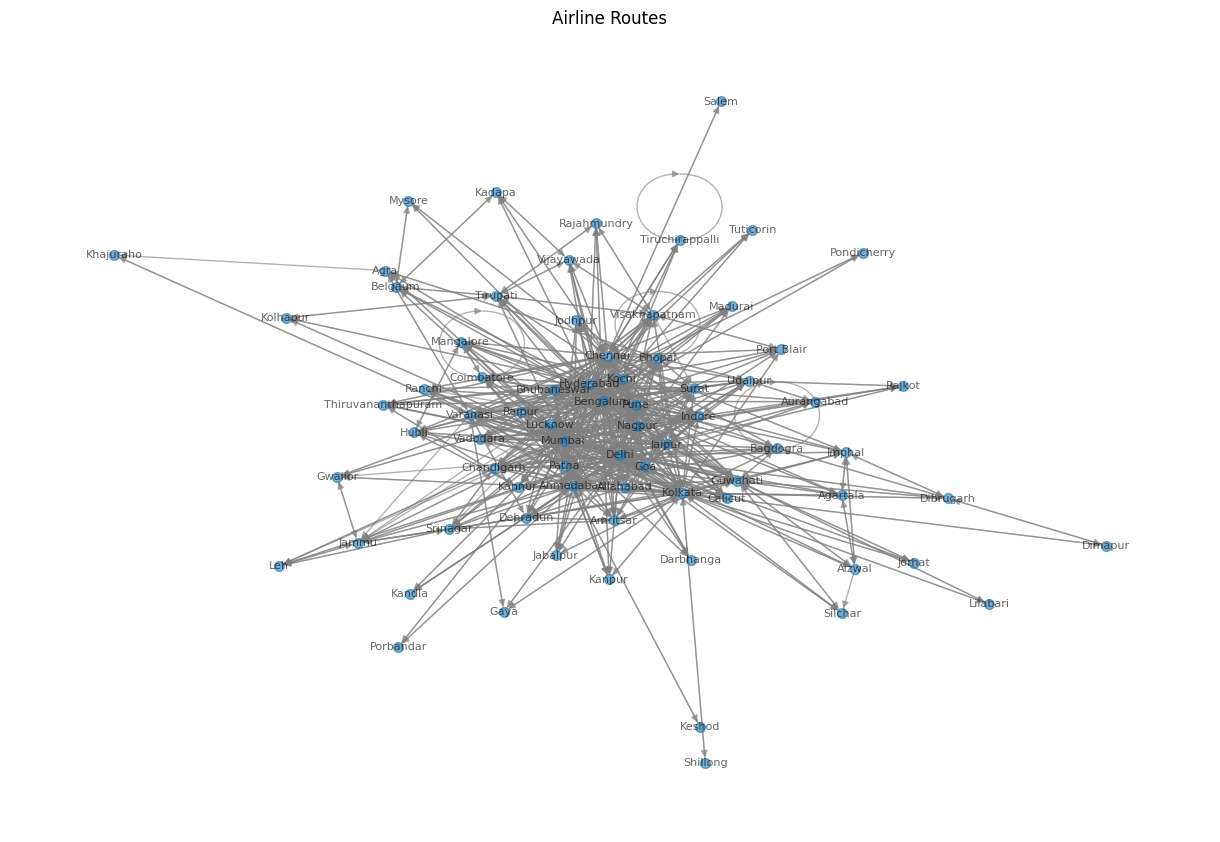

In [7]:
# Visualize the network
pos = nx.spring_layout(G)

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_size=8, node_size=50, edge_color="gray", alpha=0.6)
plt.title("Airline Routes")
plt.show()

Find the communities within the network and visualize.

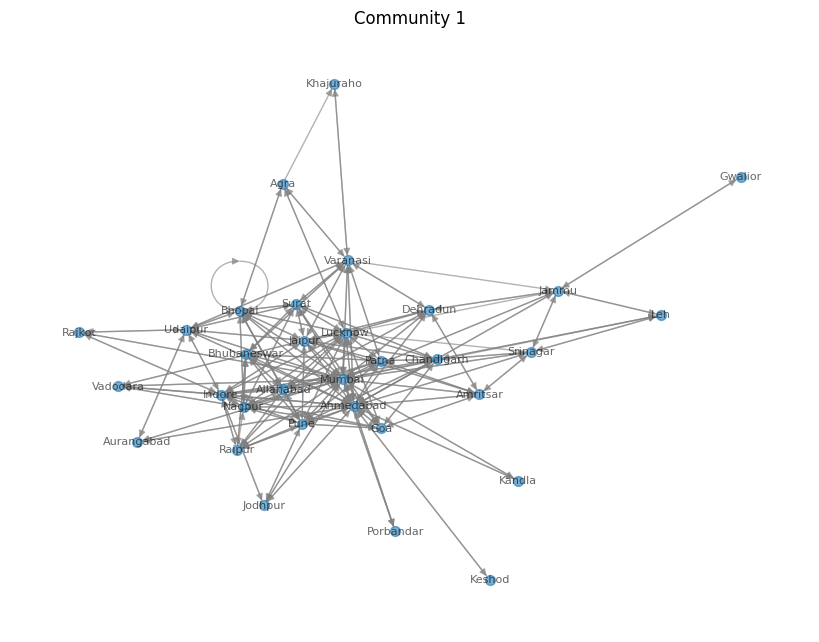

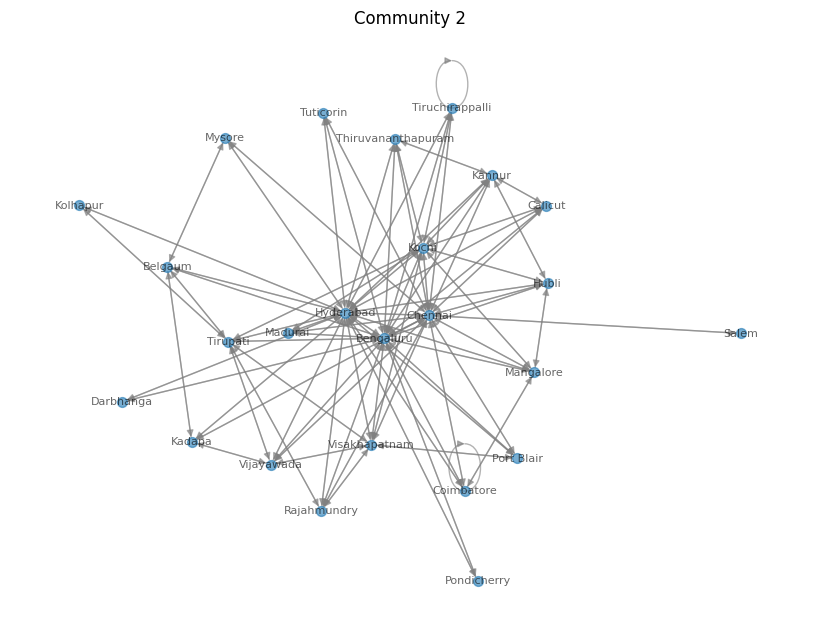

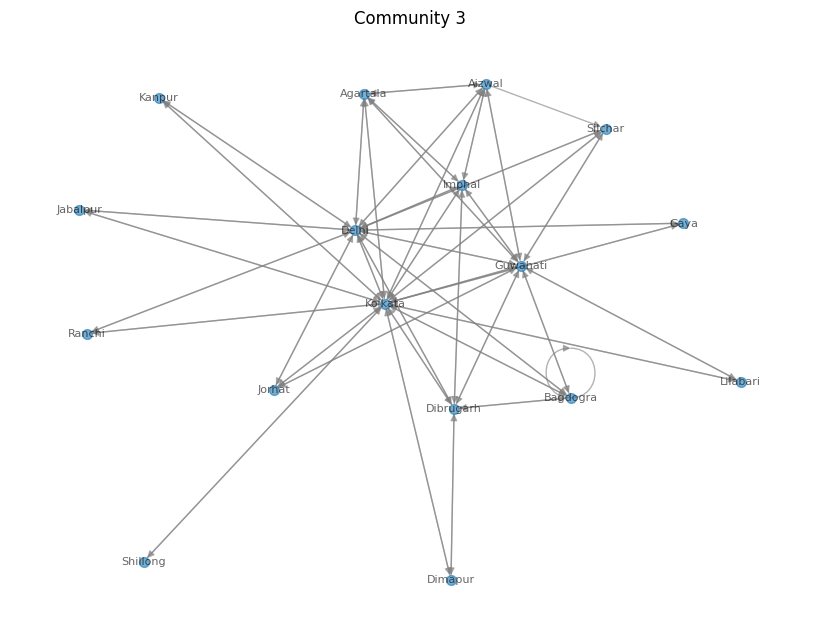

In [8]:
communities = list(nx.community.greedy_modularity_communities(G))

# Create separate graphs for each community
community_graphs = [G.subgraph(community) for community in communities]

# Visualize each community separately
for i, community_graph in enumerate(community_graphs):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(community_graph)
    nx.draw(community_graph, pos, with_labels=True, font_size=8, edge_color="gray", node_size=50, alpha=0.6)
    plt.title(f"Community {i + 1}")
    plt.show()

In [9]:
print("\nCommunities:")
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {list(community)}")


Communities:
Community 1: ['Goa', 'Indore', 'Khajuraho', 'Nagpur', 'Jammu', 'Leh', 'Agra', 'Porbandar', 'Jaipur', 'Bhopal', 'Chandigarh', 'Rajkot', 'Bhubaneswar', 'Patna', 'Allahabad', 'Ahmedabad', 'Kandla', 'Dehradun', 'Jodhpur', 'Gwalior', 'Udaipur', 'Lucknow', 'Amritsar', 'Srinagar', 'Aurangabad', 'Vadodara', 'Pune', 'Varanasi', 'Mumbai', 'Surat', 'Raipur', 'Keshod']
Community 2: ['Mangalore', 'Vijayawada', 'Visakhapatnam', 'Thiruvananthapuram', 'Hyderabad', 'Rajahmundry', 'Madurai', 'Belgaum', 'Port Blair', 'Tirupati', 'Kochi', 'Kolhapur', 'Kannur', 'Tuticorin', 'Darbhanga', 'Mysore', 'Tiruchirappalli', 'Bengaluru', 'Chennai', 'Pondicherry', 'Coimbatore', 'Calicut', 'Kadapa', 'Salem', 'Hubli']
Community 3: ['Bagdogra', 'Dimapur', 'Jorhat', 'Imphal', 'Aizwal', 'Kanpur', 'Jabalpur', 'Gaya', 'Lilabari', 'Ranchi', 'Agartala', 'Guwahati', 'Shillong', 'Dibrugarh', 'Delhi', 'Kolkata', 'Silchar']


Calculate the different metrics.

In [10]:
# Calculate network metrics
degree_centrality = nx.degree_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G)

closeness_centrality = nx.closeness_centrality(G)

eigenvector_centrality = nx.eigenvector_centrality(G)

clustering_coefficient = nx.clustering(G)
average_clustering = nx.average_clustering(G)

in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

Sort the results into top 5 and bottom 5.

In [11]:
# Sort all the results
top_5_degree_airports = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
bottom_5_degree_airports = sorted(degree_centrality, key=degree_centrality.get)[:5]

top_5_betweenness_airports = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
bottom_5_betweenness_airports = sorted(betweenness_centrality, key=betweenness_centrality.get)[:5]

top_5_closeness_airports = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
bottom_5_closeness_airports = sorted(closeness_centrality, key=closeness_centrality.get)[:5]

top_5_eigenvector_airports = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
bottom_5_eigenvector_airports = sorted(eigenvector_centrality, key=eigenvector_centrality.get)[:5]

top_5_clustering_airports = sorted(clustering_coefficient, key=clustering_coefficient.get, reverse=True)[:5]
bottom_5_clustering_airports = sorted(clustering_coefficient, key=clustering_coefficient.get)[:5]

top_5_in_degrees = sorted(in_degrees, key=in_degrees.get, reverse=True)[:5]
bottom_5_in_degrees = sorted(in_degrees, key=in_degrees.get)[:5]

top_5_out_degrees = sorted(out_degrees, key=out_degrees.get, reverse=True)[:5]
bottom_5_out_degrees = sorted(out_degrees, key=out_degrees.get)[:5]

Print all results in a clear manner.

In [12]:
# Print results
print("\nTop 5 airports by degree centrality:")
for i, airport in enumerate(top_5_degree_airports):
    print(f"{i + 1}. {airport}: {degree_centrality[airport]:.2f}")

print("\nBottom 5 airports by degree centrality:")
for i, airport in enumerate(bottom_5_degree_airports):
    print(f"{i + 1}. {airport}: {degree_centrality[airport]:.2f}")

print("\nTop 5 airports by betweenness centrality:")
for i, airport in enumerate(top_5_betweenness_airports):
    print(f"{i + 1}. {airport}: {betweenness_centrality[airport]:.2f}")

print("\nBottom 5 airports by betweenness centrality:")
for i, airport in enumerate(bottom_5_betweenness_airports):
    print(f"{i + 1}. {airport}: {betweenness_centrality[airport]:.2f}")

print("\nTop 5 airports by closeness centrality:")
for i, airport in enumerate(top_5_closeness_airports):
    print(f"{i + 1}. {airport}: {closeness_centrality[airport]:.2f}")

print("\nBottom 5 airports by closeness centrality:")
for i, airport in enumerate(bottom_5_closeness_airports):
    print(f"{i + 1}. {airport}: {closeness_centrality[airport]:.2f}")

print("\nTop 5 airports by eigenvector centrality:")
for i, airport in enumerate(top_5_eigenvector_airports):
    print(f"{i + 1}. {airport}: {eigenvector_centrality[airport]:.2f}")

print("\nBottom 5 airports by eigenvector centrality:")
for i, airport in enumerate(bottom_5_eigenvector_airports):
    print(f"{i + 1}. {airport}: {eigenvector_centrality[airport]:.2f}")

print("\nTop 5 airports by clustering coefficient:")
for i, airport in enumerate(top_5_clustering_airports):
    print(f"{i + 1}. {airport}: {clustering_coefficient[airport]:.2f}")

print("\nBottom 5 airports by clustering coefficient:")
for i, airport in enumerate(bottom_5_clustering_airports):
    print(f"{i + 1}. {airport}: {clustering_coefficient[airport]:.2f}")

print("\nAverage Clustering Coefficient:", average_clustering)

print("\nTop 5 airports by in-degrees:")
for i, node in enumerate(top_5_in_degrees):
    print(f"{i + 1}. {node}: {in_degrees[node]}")

print("\nBottom 5 airports by in-degrees:")
for i, node in enumerate(bottom_5_in_degrees):
    print(f"{i + 1}. {node}: {in_degrees[node]}")

print("\nTop 5 airports with the out-Degrees:")
for i, node in enumerate(top_5_out_degrees):
    print(f"{i + 1}. {node}: {out_degrees[node]}")

print("\nBottom 5 airports by out-degrees:")
for i, node in enumerate(bottom_5_out_degrees):
    print(f"{i + 1}. {node}: {out_degrees[node]}")


Top 5 airports by degree centrality:
1. Delhi: 1.52
2. Bengaluru: 1.48
3. Hyderabad: 1.47
4. Mumbai: 1.38
5. Kolkata: 1.22

Bottom 5 airports by degree centrality:
1. Keshod: 0.03
2. Salem: 0.03
3. Shillong: 0.03
4. Khajuraho: 0.04
5. Dimapur: 0.05

Top 5 airports by betweenness centrality:
1. Delhi: 0.16
2. Hyderabad: 0.14
3. Kolkata: 0.13
4. Bengaluru: 0.13
5. Mumbai: 0.11

Bottom 5 airports by betweenness centrality:
1. Ranchi: 0.00
2. Port Blair: 0.00
3. Aurangabad: 0.00
4. Rajkot: 0.00
5. Jodhpur: 0.00

Top 5 airports by closeness centrality:
1. Delhi: 0.80
2. Bengaluru: 0.79
3. Hyderabad: 0.78
4. Mumbai: 0.76
5. Kolkata: 0.72

Bottom 5 airports by closeness centrality:
1. Khajuraho: 0.37
2. Keshod: 0.40
3. Salem: 0.42
4. Shillong: 0.42
5. Dimapur: 0.42

Top 5 airports by eigenvector centrality:
1. Bengaluru: 0.27
2. Delhi: 0.27
3. Hyderabad: 0.27
4. Mumbai: 0.26
5. Chennai: 0.24

Bottom 5 airports by eigenvector centrality:
1. Khajuraho: 0.01
2. Keshod: 0.01
3. Shillong: 0.01
4.

Checking the distribution of different centralities. This is not required for the project, I was just interested.

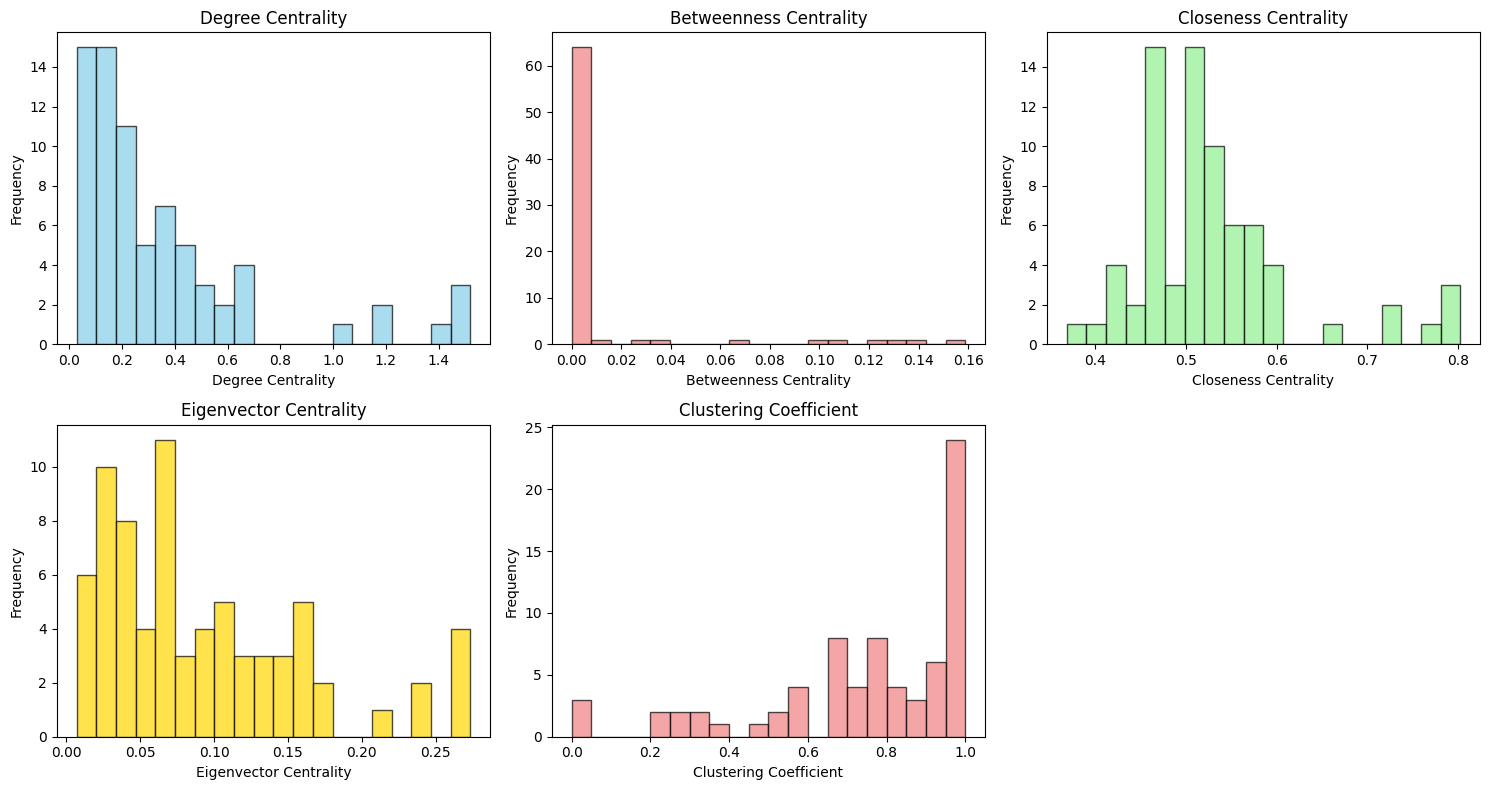

In [13]:
plt.figure(figsize=(15, 8))

# Visualize degree centrality
plt.subplot(2, 3, 1)
plt.hist(list(degree_centrality.values()), bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

# Visualize betweenness centrality
plt.subplot(2, 3, 2)
plt.hist(list(betweenness_centrality.values()), bins=20, edgecolor='black', color='lightcoral', alpha=0.7)
plt.title('Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# Visualize closeness centrality
plt.subplot(2, 3, 3)
plt.hist(list(closeness_centrality.values()), bins=20, edgecolor='black', color='lightgreen', alpha=0.7)
plt.title('Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

# Visualize eigenvector centrality
plt.subplot(2, 3, 4)
plt.hist(list(eigenvector_centrality.values()), bins=20, edgecolor='black', color='gold', alpha=0.7)
plt.title('Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

# Visualize clustering coefficient
plt.subplot(2, 3, 5)
plt.hist(list(clustering_coefficient.values()), bins=20, edgecolor='black', color='lightcoral', alpha=0.7)
plt.title('Clustering Coefficient')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

# Remove empty subplot in the last row and column
plt.subplot(2, 3, 6).axis('off')

plt.tight_layout()
plt.show()
